In [1]:
# for loop ашиглан дараах list доторх утгуудыг print хийнэ үү [3, 2, 1, 0]

In [2]:
# for loop ашиглан дараах list доторх сөрөг тооны байршлыг олно уу. Байршил гэдэг нь list доторх element-ийн index-ийг хэлнэ.
# [1, 3, 4, 5, -1, 0, 6]

In [ ]:
# shift+enter дараад уншуулна
!pip install pandas_datareader
# хэрвээ install хийсний дараа дахиад уншуулвал алдаа заана

In [5]:
# shift+enter дараад уншуулна
import pandas_datareader as pdr

In [6]:
# shift+enter дараад уншуулна
stock = ["AMZN"]
data = pdr.get_data_yahoo(stock)['Close']

# data гэсэн хувьсагчинд Amazon компанийн хувьцааны сүүлийн 5 жилийн өдөр бүрийн хаалтын ханшийг оруулсан болно.
# Амархан: 5 жилийн хувьцааний үнийн дунджийг олно уу
# Дунд: Жил бүрийн хувьцааний үнийн дунджийг олно уу
# Хүнд: 100 өдрийн Moving average дундаж үнийг олно уу

In [7]:
# Амархан - хувилбар №1
total = 0
counter = 0
for each in list(data['AMZN']):
    total += each
    counter += 1
    
print(total/counter)

2042.2969938706935


In [8]:
# Амархан - хувилбар №2
avg = sum(list(data['AMZN'])) / len(list(data['AMZN']))
print(avg)

2042.2969938706935


In [9]:
# Дунд
dates = list(data.index)
years = [2016, 2017, 2018, 2019, 2020, 2021]

yearly_prices = []

for year in years:
    prices_per_year = []
    for i in range(len(list(data['AMZN']))):
        date_time_obj = dates[i].strftime("%Y-%m-%d %H:%M:%S")
        if date_time_obj[ :4] == str(year):
            prices_per_year.append(list(data['AMZN'])[i])
    yearly_prices.append(prices_per_year)
    
    
for i in range(len(yearly_prices)):
    print("The average price for " + str(years[i]) + " is " + str(sum(yearly_prices[i]) / len(yearly_prices[i])))

The average price for 2016 is 763.3252418154761
The average price for 2017 is 968.1670116409363
The average price for 2018 is 1641.7261758629545
The average price for 2019 is 1789.189206077939
The average price for 2020 is 2680.8550957841835
The average price for 2021 is 3337.6921037946427


In [10]:
# Хүнд
MA_window = 100 # days
moving_averages = []

i = 0
while (i < len(list(data['AMZN'])) - MA_window + 1):
    current_window = list(data['AMZN'])[i : i + MA_window]
    window_avg = sum(current_window) / MA_window
    moving_averages.append(window_avg)
    i += 1

print(moving_averages)

[830.2757025146484, 832.0230023193359, 833.869501953125, 835.7582019042969, 837.5804022216797, 839.2865026855469, 840.9885028076172, 842.6434033203125, 844.5326031494141, 846.3174029541016, 848.1187030029297, 849.9849029541016, 852.0207025146484, 853.9404022216797, 855.8889025878906, 857.6305029296875, 859.5520025634765, 861.5445025634766, 863.5372021484375, 865.5313018798828, 867.6833013916016, 870.1184014892578, 872.539501953125, 874.9347021484375, 877.076401977539, 879.0760021972657, 881.1741021728516, 883.3285021972656, 885.3683020019531, 887.3326019287109, 889.263901977539, 890.9498022460938, 892.5241021728516, 894.2416021728516, 895.9230017089844, 897.3859014892578, 899.0386016845703, 900.6251013183594, 902.1595013427734, 903.8241009521485, 905.53330078125, 907.3359008789063, 908.9522009277343, 910.3205010986328, 912.1218011474609, 913.8047009277344, 915.3597009277344, 916.6992004394531, 918.1996008300781, 919.5764007568359, 920.9987005615235, 922.5995001220704, 924.1138000488281

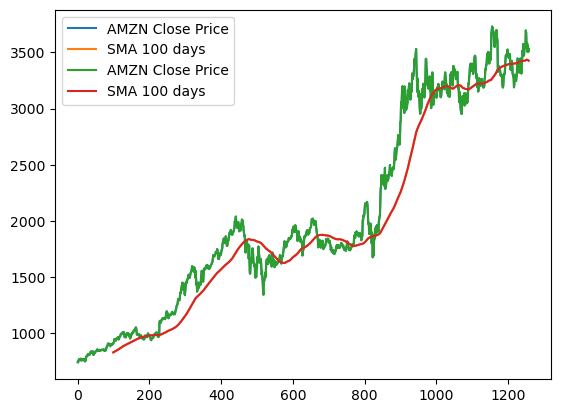

In [12]:
# 100 өдрийн Moving Average-ыг ханштайгаа харьцуулж харах

for i in range(len(data['AMZN']) - len(moving_averages)):
    moving_averages.insert(0, None)
    
import matplotlib.pyplot as plt
plt.plot(list(data['AMZN']), label = "AMZN Close Price")
plt.plot(moving_averages, label = "SMA 100 days")
plt.legend()
plt.show()